# Ch 04 The Bias-Variance Trade-Off

A cost function tells us how far off our model predictions are from being correct. For classification problems, esp. fitting log regression models, a typical cost function is the log-loss function or cross entropy loss, it is defined as follows:

$\large \text{log loss} = \dfrac{1}{n}\sum_{i=1}^n-\left(y_i\log(p_i)+ (1-y_i)\log(1-p_i)\right)$

 * $n$ number of trianing samples
 * $y_i$ is the true label of the $i$th sample (1 or 0)
 * $p_i$ is the predicted probability that the label of the $i$th sample equals 1
 * $\text{log}$ is the natural log.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.colormaps['tab10'];

Let's plot the log loss functions for an individual observations, one for $p = 1$ and one for $p = 0$.

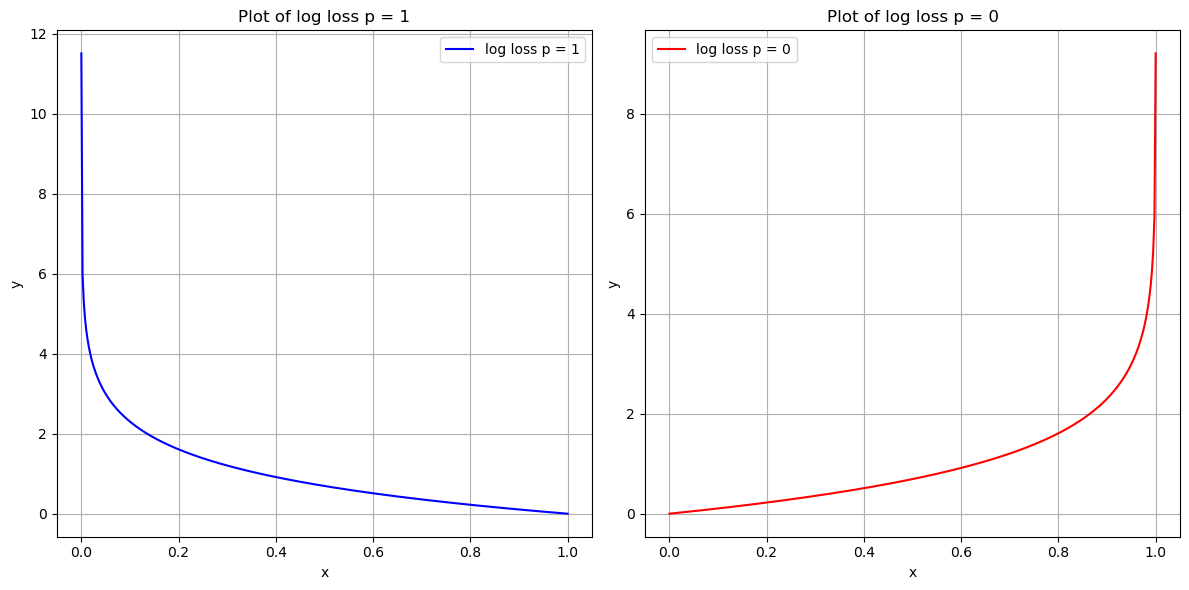

In [2]:
# Generate x values for both functions
x_values = np.linspace(0.00001, .9999, 400) # remember the domain of ln(x)! 

# Compute y values for y = log loss at 1
y_log_loss_1 = (-1)*np.log(x_values)

# Compute y values for y = log loss at 0
y_log_loss_0 = -np.log(1-(x_values))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot log loss p = 1
ax1.plot(x_values, y_log_loss_1, label='log loss p = 1', color='blue')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Plot of log loss p = 1')
ax1.grid(True)
ax1.legend()

# Plot log loss p = 0
ax2.plot(x_values, y_log_loss_0, label='log loss p = 0', color='red')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Plot of log loss p = 0')
ax2.grid(True)
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

These plots make sense. You are "penalized" greatly (a "high cost") when predicting a true value of 1 to be closer to zero, and similarly for predicting a true value of 0 to be close to 1.

Let's define a cost function $y = x^2 - 2x$ and use gradient descent.

In [3]:
X_poly = np.linspace(-3,5,81) # if the last value is 9 you get -3,-2...,4,5
X_poly

array([-3. , -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. ,
       -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9,
       -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,
        0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,
        1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,
        2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,
        3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,
        4.7,  4.8,  4.9,  5. ])

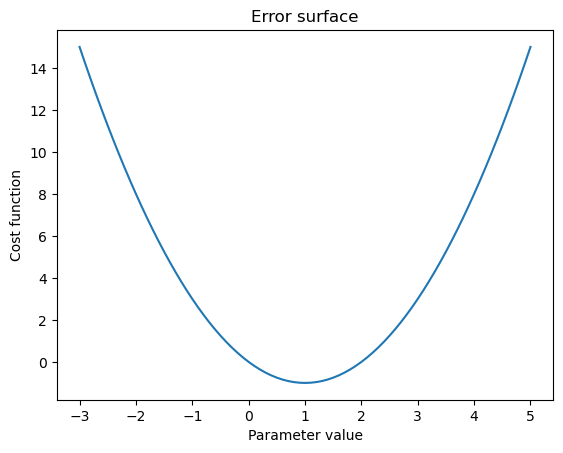

In [4]:
def cost_function(X):
    return X * (X - 2)
y_poly = cost_function(X_poly) # if np.linspace(-3,5,9) the function evaluates at interger values of x only
plt.plot(X_poly, y_poly)
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.title('Error surface')
plt.show()

**Gradient Descent** is defined in this book as $x_{\text{new}}= x_{\text{old}} - f'\left(x_{\text{old}}\right)*\text{learning rate}$

In [5]:
def gradient(X):
    return (2*X) - 2
x_start = 4.5 # why 4.5?
learning_rate = 0.75 # why ? 
x_next = x_start - gradient(x_start)*learning_rate
x_next

-0.75

**Quick check** 
\begin{align*} 
f(x) &= x^2 - 2x \\ 
& \text{and}\\
f'(x) &= 2x - 2 \\
& \text{and} \\
f'(4.5) &= 2(4.5)-2 \\
& = 9-2 \\ 
& = 7 \\
& \text{and} \\
4.5 - f'(4.5)*.75 &= 4.5 -  7*.75 \\
& = -.75
\end{align*}

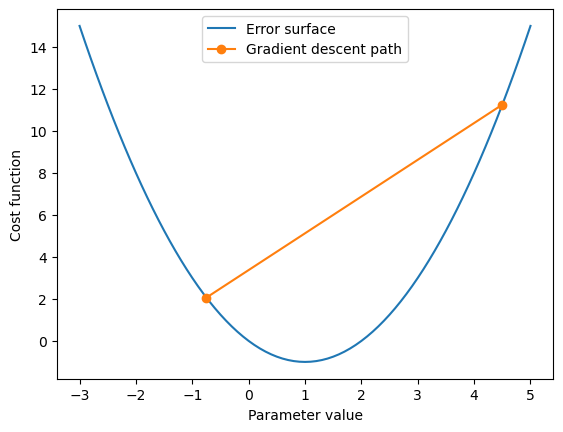

In [6]:
plt.plot(X_poly, y_poly)
plt.plot([x_start,x_next],[cost_function(x_start),cost_function(x_next)],'-o')
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.legend(['Error surface', 'Gradient descent path'])
plt.show()

In [7]:
iterations = 15 
x_path = np.empty(iterations,)
x_path[0] = x_start
for iteration_count in range(1,iterations):
    derivative = gradient(x_path[iteration_count-1])
    x_path[iteration_count] = x_path[iteration_count-1]-(derivative*learning_rate)
x_path

array([ 4.5       , -0.75      ,  1.875     ,  0.5625    ,  1.21875   ,
        0.890625  ,  1.0546875 ,  0.97265625,  1.01367188,  0.99316406,
        1.00341797,  0.99829102,  1.00085449,  0.99957275,  1.00021362])

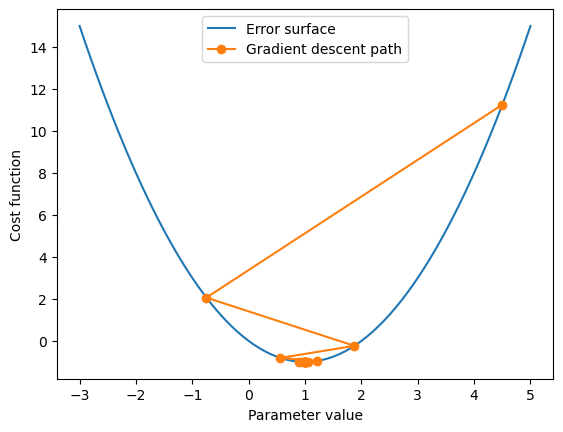

In [8]:
plt.plot(X_poly, y_poly)
plt.plot(x_path,cost_function(x_path),'-o')
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.legend(['Error surface','Gradient descent path'])
plt.show()

## Generating and modeling synthetic classification data

In [9]:
# import from sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [10]:
X_synthetic, y_synthetic = make_classification(
    n_samples = 1000, 
    n_features = 200, 
    n_informative = 3, 
    n_redundant = 10, 
    n_repeated = 0, 
    n_classes = 2, 
    n_clusters_per_class = 2, 
    weights = None, 
    flip_y = 0.01, 
    class_sep = 0.8, 
    hypercube = True, 
    shift = 0.0, 
    scale = 1.0, 
    shuffle = True, 
    random_state = 24)

The parameters are explained here. 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [11]:
print(X_synthetic.shape, y_synthetic.shape)

(1000, 200) (1000,)


This has generated an almost perfectly-balanced dataset. Almost 50/50 class balance, and all features that they have the same scale (mean 0 with standard deviation 1). This scaling is important for using regularization methods. Scikitlearn has functionality to scale if needed.

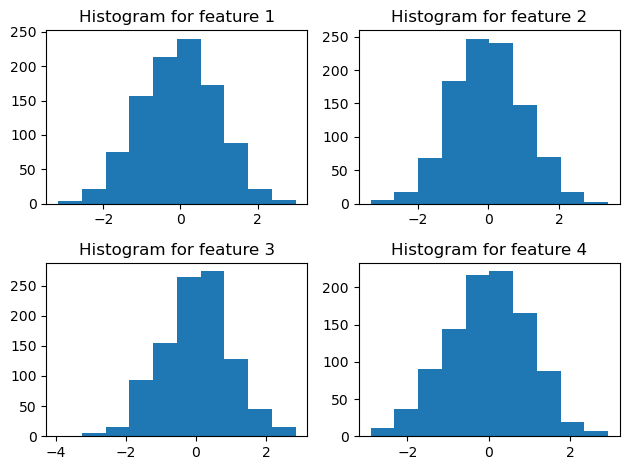

In [12]:
# this take a long time to plot! (~5-15 seconds)
for plot_index in range(4):
    plt.subplot(2,2,plot_index+1)
    plt.hist(X_synthetic[:,plot_index]) # forget the "," and this won't plot at all!
    plt.title('Histogram for feature {}'.format(plot_index+1))
plt.tight_layout()

In [13]:
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(
    X_synthetic, 
    y_synthetic,
    test_size = 0.2,
    random_state = 24)
lr_syn = LogisticRegression(
    solver='liblinear', 
    penalty='l1', # L1 regularization, aka lasso regularization
    C=1000, # inverse of regularization strength
    random_state=1)
lr_syn.fit(X_syn_train,y_syn_train);

See the scikit-learn documentation for more on these parameters and their meanings in depth
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [14]:
y_syn_train_predict_proba = lr_syn.predict_proba(X_syn_train)
roc_auc_score(y_syn_train, y_syn_train_predict_proba[:,1])

0.9420000000000001

In [15]:
y_syn_test_predict_proba = lr_syn.predict_proba(X_syn_test)
roc_auc_score(y_syn_test, y_syn_test_predict_proba[:,1])

0.8075807580758075

Since the ROC AUC score training data >> ROC AUC score test data ==> the logistic regression model has overfit the data.

## Lasso and Ridge Regularization

$\large \text{log loss with lasso penalty} = \sum_{j = 1}^{m}|\sigma_j| + \frac{C}{n}\sum_{i = 1}^{n}-\left(y_i\log(p_i)+(1-y_i)\log(1-p_i)\right)$

$\large \text{log loss with ridge penalty} = \sum_{j = 1}^{m}\sigma_j^2 + \frac{C}{n}\sum_{i = 1}^{n}-\left(y_i\log(p_i)+(1-y_i)\log(1-p_i)\right)$

See bottom of pg 5 of this PDF for a nice table. https://people.cs.umass.edu/~domke/courses/sml2010/03linear.pdf

See 6.2.1 and 6.2.2 for a detailed discussion of Lasso and Ridge https://www.statlearning.com/ fig 6.7 is especially nice.

In [16]:
C_val_exponents = np.linspace(3,-3,13)
C_val_exponents

array([ 3. ,  2.5,  2. ,  1.5,  1. ,  0.5,  0. , -0.5, -1. , -1.5, -2. ,
       -2.5, -3. ])

In [17]:
C_vals = np.float_(10)**C_val_exponents # note the 1st edition has np.float() which is no longer supported
C_vals

array([1.00000000e+03, 3.16227766e+02, 1.00000000e+02, 3.16227766e+01,
       1.00000000e+01, 3.16227766e+00, 1.00000000e+00, 3.16227766e-01,
       1.00000000e-01, 3.16227766e-02, 1.00000000e-02, 3.16227766e-03,
       1.00000000e-03])

In [18]:
# more importing from sklearn
from sklearn.metrics import roc_curve
from sklearn.linear_model import Ridge
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
cmap = mpl.colormaps['viridis']

In [19]:
n_folds = 4
k_folds = KFold(n_splits=n_folds, shuffle=False)

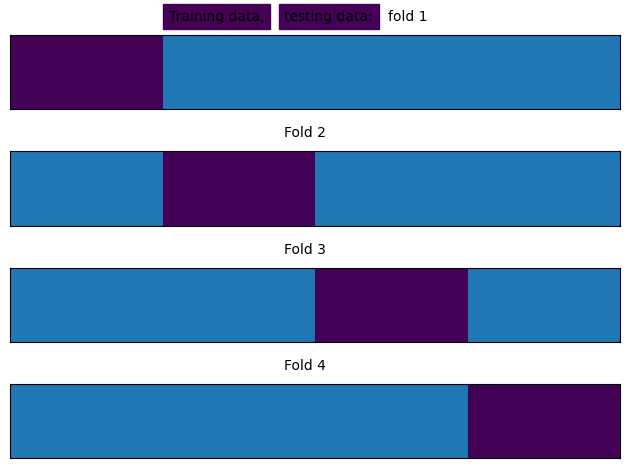

In [20]:
def plot_kfolds(k_folds_iterator):
    fold_counter = 0
    for train_index, test_index in k_folds_iterator.split(X_syn_train, y_syn_train):

        #Axis to hold the plot of this fold
        ax = plt.subplot(n_folds,1,fold_counter+1)

        #Background rectangle representing all samples
        n_train_samples = len(y_syn_train)
        rect = mpl.patches.Rectangle(xy=(0,0), width=n_train_samples, height=1)
        ax.add_patch(rect)

        #Plot each testing sample from this fold as a vertical line
        for this_text_ix in test_index:
            ax.plot([this_text_ix, this_text_ix], [0, 1], color=cmap(1),
                    linewidth=0.75)

        #Plot formatting
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlim(0, n_train_samples)
        ax.set_ylim(0,1)
        
        #Subplot titles
        if fold_counter == 0:
            ax.text(0.26, 1.2, 'Training data,',
                    transform=ax.transAxes, backgroundcolor = cmap(0))
            ax.text(0.45, 1.2, 'testing data:',
                    transform=ax.transAxes, backgroundcolor = cmap(1))
            ax.text(0.62, 1.2, 'fold {}'.format(fold_counter+1), transform=ax.transAxes)
        else:
            ax.text(0.45, 1.2, 'Fold {}'.format(fold_counter+1), transform=ax.transAxes)

        fold_counter += 1

    plt.tight_layout()

    
plot_kfolds(k_folds);

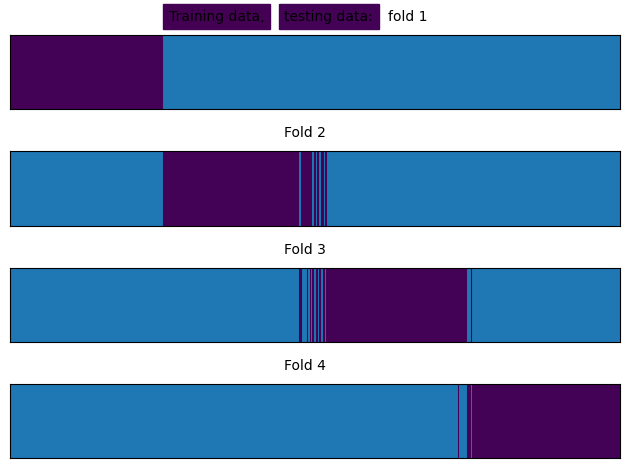

In [21]:
k_folds = StratifiedKFold(
    n_splits = n_folds, 
    shuffle=False)
plot_kfolds(k_folds)

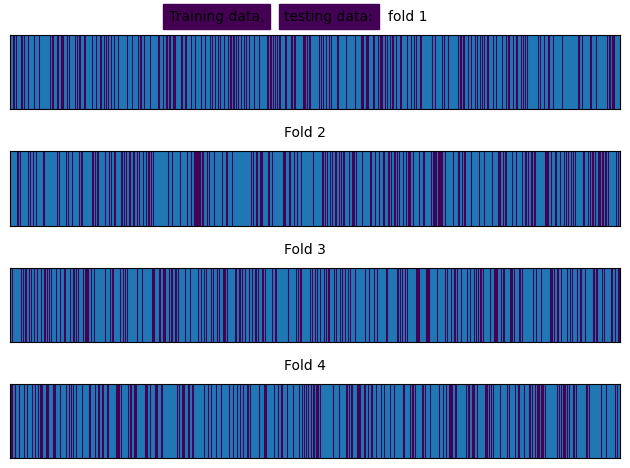

In [22]:
k_folds = StratifiedKFold(
    n_splits=n_folds, 
    shuffle=True)
plot_kfolds(k_folds)

In [23]:
def cross_val_C_search(k_folds, C_vals, model, X, Y):
    
    n_folds = k_folds.n_splits
    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc = [[]]*len(C_vals)

    for c_val_counter in range(len(C_vals)):
        #Set the C value for the model object
        model.C = C_vals[c_val_counter]
        #Count folds for each value of C
        fold_counter = 0
        #Get training and testing indices for each fold
        for train_index, test_index in k_folds.split(X, Y):
            #Subset the features and response, for training and testing data for
            #this fold
            X_cv_train, X_cv_test = X[train_index], X[test_index]
            y_cv_train, y_cv_test = Y[train_index], Y[test_index]

            #Fit the model on the training data
            model.fit(X_cv_train, y_cv_train)

            #Get the training ROC AUC
            y_cv_train_predict_proba = model.predict_proba(X_cv_train)
            cv_train_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_train, y_cv_train_predict_proba[:,1])

            #Get the testing ROC AUC
            y_cv_test_predict_proba = model.predict_proba(X_cv_test)
            cv_test_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_test, y_cv_test_predict_proba[:,1])

            #Testing ROC curves for each fold
            this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])
            cv_test_roc[c_val_counter].append(this_fold_roc)

            #Increment the fold counter
            fold_counter += 1

        #Indicate progress
        print('Done with C = {}'.format(lr_syn.C))

    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc

In [24]:
# this takes ~30-45 seconds to run!
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = \
cross_val_C_search(k_folds, C_vals, lr_syn, X_syn_train, y_syn_train)

Done with C = 1000.0
Done with C = 316.22776601683796
Done with C = 100.0
Done with C = 31.622776601683793
Done with C = 10.0
Done with C = 3.1622776601683795
Done with C = 1.0
Done with C = 0.31622776601683794
Done with C = 0.1
Done with C = 0.03162277660168379
Done with C = 0.01
Done with C = 0.0031622776601683794
Done with C = 0.001


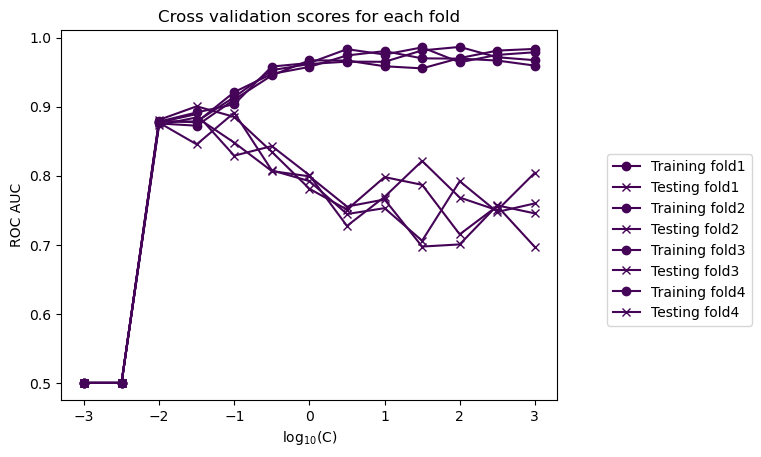

In [25]:
for this_fold in range(n_folds):
    plt.plot(C_val_exponents,
             cv_train_roc_auc[this_fold], 
             '-o',
             color=cmap(this_fold),
             label='Training fold{}'.format(this_fold+1))
    plt.plot(C_val_exponents,
            cv_test_roc_auc[this_fold],
            '-x',
            color=cmap(this_fold),
            label='Testing fold{}'.format(this_fold+1))
    plt.ylabel('ROC AUC')
    plt.xlabel('log$_{10}$(C)')
    plt.legend(loc = [1.1, 0.2])
    plt.title('Cross validation scores for each fold')


Text(0.5, 1.0, 'Cross validation scores averaged over all folds')

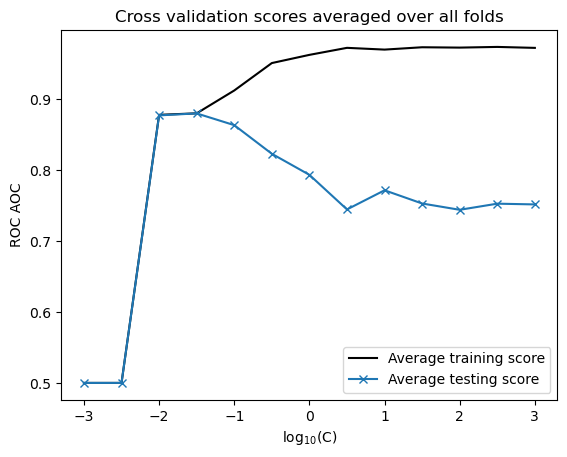

In [26]:
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis=0),'-0',label='Average training score')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis=0),'-x',label = 'Average testing score')
plt.ylabel('ROC AOC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation scores averaged over all folds')

## Interpretation

The testing and trainig scores seem optimized with $C \approx 10^{-1.5}$. Below that and the ROC AUC score is 0.5 or less, which is worthless. More than that, and the testing and traning scores diverge, here that indicates overfitting. At $C \approx 10^{-1.5}$ test and train scores are about equal and the ROC AUC score is just shy of 0.9 indicating a strong model.

In [27]:
# recall this array from earlier
C_val_exponents

array([ 3. ,  2.5,  2. ,  1.5,  1. ,  0.5,  0. , -0.5, -1. , -1.5, -2. ,
       -2.5, -3. ])

In [28]:
# which value from that array is -1.5?
best_C_val_bool = C_val_exponents == -1.5
best_C_val_bool.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [29]:
#finds the index of the best C value exponent
best_C_val_ix = np.nonzero(best_C_val_bool.astype(int)) 
best_C_val_ix[0][0]

9

In [30]:
type(best_C_val_ix)

tuple

In [31]:
best_C_val_ix

(array([9]),)

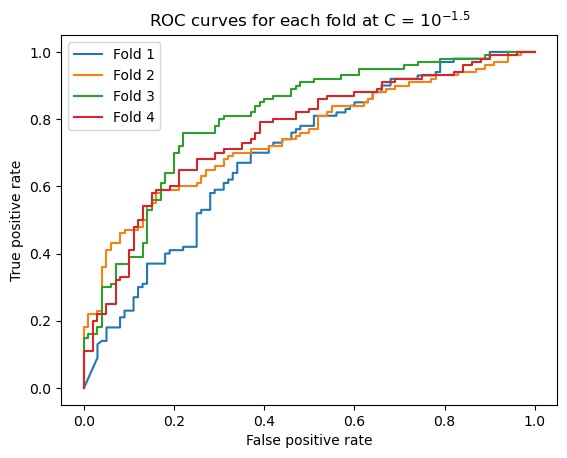

In [32]:
for this_fold in range(n_folds):
    fpr = cv_test_roc[best_C_val_ix[0][0]][this_fold][0]
    tpr = cv_test_roc[best_C_val_ix[0][0]][this_fold][1]
    plt.plot(fpr, tpr, label = 'Fold {}'.format(this_fold+1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curves for each fold at C = $10^{-1.5}$')
plt.legend();

In [35]:
# set C value, train the model on all training data
lr_syn.C = 10**(-1.5)
lr_syn.fit(X_syn_train, y_syn_train)

LogisticRegression(C=0.03162277660168379, penalty='l1', random_state=1,
                   solver='liblinear')

In [38]:
y_syn_train_predict_proba = lr_syn.predict_proba(X_syn_train)
roc_auc_score(y_syn_train, y_syn_train_predict_proba[:,1])

0.8802812499999999

In [39]:
y_syn_test_predict_proba = lr_syn.predict_proba(X_syn_test)
roc_auc_score(y_syn_test,y_syn_test_predict_proba[:,1])

0.8847884788478848

## Interpretation

The model traning and testing scores are accurate to within 1/100 and regularization has solved the overfitting problem. 

Next we'll find how many coefficients of the trained model were set to zero.

In [42]:
sum((lr_syn.coef_ != 0)[0])
# the result is 2 meaning that 2 of 200 were NOT set to zero.

2

In [44]:
lr_syn.intercept_
# intercept was regularized to zero

array([0.])